In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv("train.csv",skiprows=range(10000,42000)) #reading the csv files using pandas
test_data = pd.read_csv("test.csv",skiprows=range(1000,28000))

In [20]:
train_data.shape # print the dimension or shape of train data

(10000, 785)

In [21]:
test_data.shape # print the dimension or shape of test data

(1000, 784)

In [22]:
train_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [23]:
train_data.isnull().sum().head(15)

label      0
pixel0     0
pixel1     0
pixel2     0
pixel3     0
pixel4     0
pixel5     0
pixel6     0
pixel7     0
pixel8     0
pixel9     0
pixel10    0
pixel11    0
pixel12    0
pixel13    0
dtype: int64

In [24]:
test_data.isnull().sum().head(15)

pixel0     0
pixel1     0
pixel2     0
pixel3     0
pixel4     0
pixel5     0
pixel6     0
pixel7     0
pixel8     0
pixel9     0
pixel10    0
pixel11    0
pixel12    0
pixel13    0
pixel14    0
dtype: int64

In [25]:
test_data.describe()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
count  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...     pixel774     pixel775     pixel776     pixel777  \
count  1000.0  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.0  ...     0.004000     0.103000     0.139000     0.028000   
std       0.0  ...     0.126491     3.257146     4.395566     0.885438   
min       0.0  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
50%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
75%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
max       0.0  ...     4.000000   103.000000   139.000000    28.000000   

       pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  
count    1000.0    1000.0    1000.0    1000.0    1000.0    1000.0  
mean        0.0       0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0       0.0  

[8 rows x 784 columns]

In [26]:
train_data.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  10000.000000  10000.0  10000.0  10000.0  10000.0  10000.0  10000.0   
mean       4.445600      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.885598      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...     pixel774      pixel775  \
count  10000.0  10000.0  10000.0  ...  10000.00000  10000.000000   
mean       0.0      0.0      0.0  ...      0.15130      0.107800   
std        0.0      0.0      0.0  ...      5.37828      4.515176   
min        0.0      0.0      0.0  ...      0.00000      0.000000   
25%        0.0      0.0      0.0  ...      0.00000      0.000000   
50%        0.0      0.0      0.0  ...      0.00000      0.000000   
75%        0.0      0.0      0.0  ...      0.00000      0.000000   
max        0.0      0.0      0.0  ...    253.00000    253.000000   

           pixel776    pixel777    pixel778  pixel779  pixel780  pixel781  \
count  10000.000000  10000.0000  10000.0000   10000.0   10000.0   10000.0   
mean       0.042200      0.0177      0.0022       0.0       0.0       0.0   
std        2.849462      1.7700      0.2200       0.0       0.0       0.0   
min        0.000000      0.0000      0.0000       0.0       0.0       0.0   
25%        0.000000      0.0000      0.0000       0.0       0.0       0.0   
50%        0.000000      0.0000      0.0000       0.0       0.0       0.0   
75%        0.000000      0.0000      0.0000       0.0       0.0       0.0   
max      252.000000    177.0000     22.0000       0.0       0.0       0.0   

       pixel782  pixel783  
count   10000.0   10000.0  
mean        0.0       0.0  
std         0.0       0.0  
min         0.0       0.0  
25%         0.0       0.0  
50%         0.0       0.0  
75%         0.0       0.0  
max         0.0       0.0  

[8 rows x 785 columns]

In [27]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


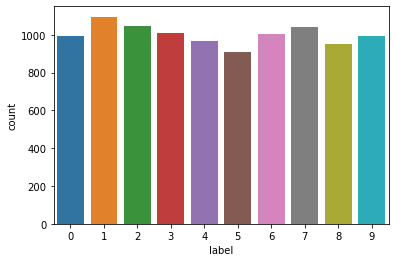

In [28]:
sns.countplot(train_data["label"])

1    1095
2    1045
7    1039
3    1009
6    1003
9     995
0     991
4     967
8     950
5     906
Name: label, dtype: int64

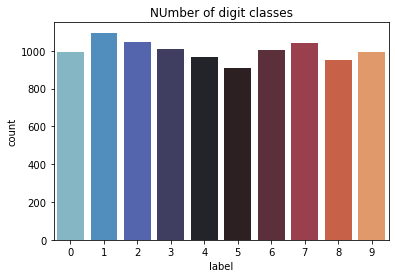

In [29]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

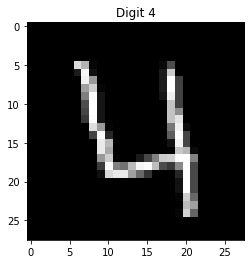

In [30]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

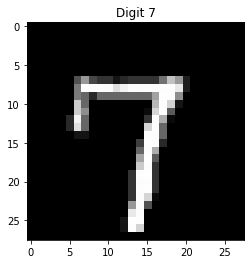

In [31]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [32]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [33]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(10000, 785)


In [34]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (10000, 784)
test_data: (1000, 784)


In [35]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [36]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8996666666666666 

[[281   0   1   1   1   1   2   0   2   0]
 [  0 331   1   0   0   2   0   2   2   1]
 [  1   9 282   3   4   0   6   2   8   1]
 [  1   2   5 274   0  20   0   1  10  10]
 [  0   0   4   0 251   0   2   2   0  22]
 [  1   2   2  16   4 241   3   1   5   4]
 [  6   1   5   0   1   3 295   0   2   0]
 [  0   5   8   1   4   0   0 273   0  13]
 [  4  15   4   7   3  14   1   1 229   2]
 [  1   0   2   4  15   2   0   7   3 242]]
